In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
colnames=['date', 'time', 'page', 'user', 'cohort', 'ip']
df_orig = pd.read_csv('curriculum-access.txt',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"')

In [3]:
df_orig.head(60)

,date,time,page,user,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,98.106.20.62
6,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62
7,2018-01-26,09:56:48,javascript-i/functions,3,22.0,98.106.20.62
8,2018-01-26,09:56:59,javascript-i/loops,2,22.0,98.106.20.62
9,2018-01-26,09:58:26,javascript-i/functions,4,22.0,98.106.20.62


In [4]:
df_orig.tail(60)

,date,time,page,user,cohort,ip
543536,2020-05-15,14:34:16,jquery/ajax/requests-and-responses,635,57.0,105.191.243.25
543537,2020-05-15,14:34:39,jquery,636,57.0,100.101.176.93
543538,2020-05-15,14:34:50,jquery/effects,636,57.0,100.101.176.93
543539,2020-05-15,14:34:55,jquery/events,636,57.0,100.101.176.93
543540,2020-05-15,14:34:56,jquery/events/mouse-events,636,57.0,100.101.176.93
543541,2020-05-15,14:35:09,jquery/ajax/requests-and-responses,636,57.0,100.101.176.93
543542,2020-05-15,14:35:25,java-ii/file-io,598,56.0,73.183.215.181
543543,2020-05-15,14:41:28,jquery/ajax/weather-map,428,28.0,71.122.184.96
543544,2020-05-15,14:41:32,spring,546,28.0,68.12.147.89
543545,2020-05-15,14:41:37,spring/fundamentals/form-model-binding,546,28.0,68.12.147.89


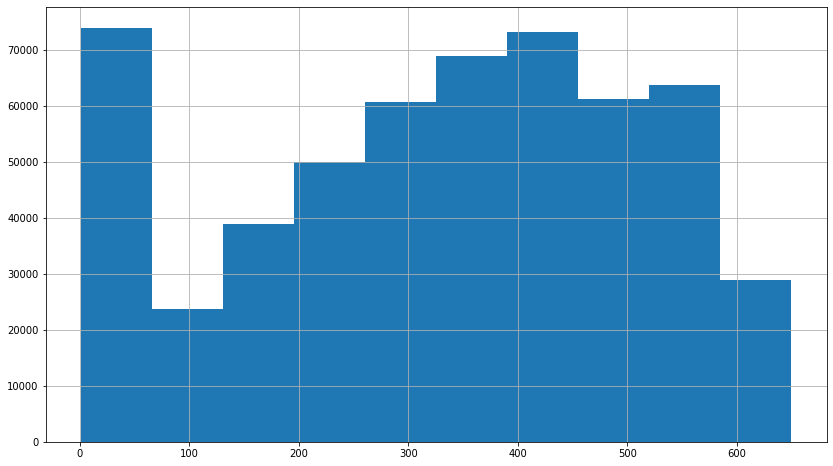

In [5]:
plt.figure(figsize=(14,8))
df_orig.user.hist()

In [6]:
df_orig.shape

(543596, 6)

In [7]:
df_orig.ip.value_counts()

98.106.20.59       284579
98.106.20.62        61662
193.172.118.211      9029
13.107.209.195       4219
173.125.68.94        2980
                    ...  
173.59.108.34           1
108.78.219.168          1
13.209.133.4            1
108.78.222.41           1
185.204.150.108         1
Name: ip, Length: 3495, dtype: int64

In [8]:
df_orig[df_orig.user == 11].head(50)

,date,time,page,user,cohort,ip
30,2018-01-26,10:14:47,/,11,1.0,98.106.20.62
31,2018-01-26,10:14:51,javascript-i,11,1.0,98.106.20.62
33,2018-01-26,10:15:02,javascript-i/functions,11,1.0,98.106.20.62
134,2018-01-26,11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,98.106.20.62
136,2018-01-26,11:46:39,appendix,11,1.0,98.106.20.62
139,2018-01-26,11:46:47,appendix/further-reading/javascript/hoisting,11,1.0,98.106.20.62
141,2018-01-26,11:47:01,appendix/capstone-workbook,11,1.0,98.106.20.62
142,2018-01-26,11:47:03,javascript-i,11,1.0,98.106.20.62
143,2018-01-26,11:47:05,javascript-i/functions,11,1.0,98.106.20.62
179,2018-01-26,12:10:30,javascript-i/conditionals,11,1.0,98.106.20.62


In [9]:
df_orig[df_orig.user == 11].tail(50)

,date,time,page,user,cohort,ip
540849,2020-05-13,09:17:03,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,11,28.0,77.186.146.232
540859,2020-05-13,09:20:35,/,11,28.0,77.186.146.232
540860,2020-05-13,09:20:37,appendix,11,28.0,77.186.146.232
540862,2020-05-13,09:20:43,appendix/capstone-workbook,11,28.0,77.186.146.232
540878,2020-05-13,09:31:09,appendix,11,28.0,77.186.146.232
540879,2020-05-13,09:31:11,appendix/capstone-workbook,11,28.0,77.186.146.232
541038,2020-05-13,10:22:38,10-anomaly-detection/1-overview,11,28.0,77.186.146.232
541039,2020-05-13,10:22:38,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,11,28.0,77.186.146.232
541040,2020-05-13,10:22:39,10-anomaly-detection/2-continuous-probabilisti...,11,28.0,77.186.146.232
541643,2020-05-13,16:45:12,/,11,28.0,77.186.146.232


In [10]:
df_orig[df_orig.user == 11]['cohort'].value_counts(dropna=False)

28.0    8330
1.0     2735
Name: cohort, dtype: int64

In [11]:
df_orig[df_orig.user == 11]['ip'].value_counts()

98.106.20.59       7049
77.186.132.227     1799
98.106.20.62       1459
77.186.146.232      344
77.186.143.245      238
77.186.153.59        71
193.172.118.211      37
73.129.137.220       23
68.165.151.91        11
73.182.122.85        11
100.204.27.56         5
209.55.84.146         4
145.179.2.47          2
209.55.84.164         2
76.55.34.189          2
209.55.84.235         1
173.57.16.52          1
73.206.180.124        1
100.204.28.232        1
100.204.156.183       1
100.204.156.79        1
100.204.144.3         1
100.204.27.10         1
Name: ip, dtype: int64

In [12]:
df_orig[df_orig.page == 'spring/fundamentals/form-model-binding'].user.value_counts()

157    188
64     136
53      99
323     45
314     43
      ... 
497      1
560      1
501      1
271      1
285      1
Name: user, Length: 329, dtype: int64

In [13]:
df_orig[df_orig.page == '10-anomaly-detection/1-overview'].head(20)

,date,time,page,user,cohort,ip
312642,2019-08-02,08:34:08,10-anomaly-detection/1-overview,1,28.0,71.122.216.54
312869,2019-08-02,09:14:25,10-anomaly-detection/1-overview,18,22.0,46.21.118.183
312999,2019-08-02,10:48:21,10-anomaly-detection/1-overview,146,28.0,98.106.20.59
313012,2019-08-02,10:55:22,10-anomaly-detection/1-overview,11,28.0,98.106.20.59
313369,2019-08-02,14:20:39,10-anomaly-detection/1-overview,11,28.0,98.106.20.59
313372,2019-08-02,14:20:58,10-anomaly-detection/1-overview,11,28.0,98.106.20.59
313439,2019-08-02,15:19:48,10-anomaly-detection/1-overview,11,28.0,98.106.20.59
314023,2019-08-04,20:40:18,10-anomaly-detection/1-overview,11,28.0,77.186.132.227
314031,2019-08-04,20:50:23,10-anomaly-detection/1-overview,11,28.0,77.186.132.227
314627,2019-08-05,11:24:55,10-anomaly-detection/1-overview,11,28.0,98.106.20.59


In [14]:
df_orig[df_orig.page == '10-anomaly-detection/1-overview'].tail(20)

,date,time,page,user,cohort,ip
539678,2020-05-11,18:43:58,10-anomaly-detection/1-overview,11,28.0,77.186.132.227
539728,2020-05-11,22:27:21,10-anomaly-detection/1-overview,576,55.0,100.127.114.141
540848,2020-05-13,09:17:02,10-anomaly-detection/1-overview,11,28.0,77.186.146.232
541038,2020-05-13,10:22:38,10-anomaly-detection/1-overview,11,28.0,77.186.146.232
541225,2020-05-13,11:41:39,10-anomaly-detection/1-overview,581,55.0,73.191.188.174
541443,2020-05-13,14:10:38,10-anomaly-detection/1-overview,589,55.0,71.131.128.114
541640,2020-05-13,16:45:06,10-anomaly-detection/1-overview,248,28.0,174.174.116.202
541646,2020-05-13,16:45:14,10-anomaly-detection/1-overview,11,28.0,77.186.146.232
541650,2020-05-13,16:45:32,10-anomaly-detection/1-overview,248,28.0,174.174.116.202
541654,2020-05-13,16:45:48,10-anomaly-detection/1-overview,11,28.0,77.186.146.232


In [15]:
df_orig.isna().sum()

date          0
time          0
page          1
user          0
cohort    27856
ip            0
dtype: int64

In [16]:
df_orig[df_orig.cohort.isna()].tail(50)

,date,time,page,user,cohort,ip
538055,2020-05-09,10:21:40,3-sql/1-mysql-overview,429,NaN,69.202.220.224
538056,2020-05-09,10:21:42,5-stats/1-overview,429,NaN,69.202.220.224
538057,2020-05-09,10:21:46,5-stats/2-simulation,429,NaN,69.202.220.224
538058,2020-05-09,10:21:48,5-stats/3-probability-distributions,429,NaN,69.202.220.224
538138,2020-05-09,15:19:39,/,362,NaN,105.183.16.215
538197,2020-05-09,21:57:58,/,362,NaN,105.183.16.215
538274,2020-05-10,10:48:12,/,362,NaN,105.183.16.215
538291,2020-05-10,11:28:41,/,353,NaN,13.221.221.59
538293,2020-05-10,11:28:44,1-fundamentals/1.2-data-science-pipeline,353,NaN,13.221.221.59
538294,2020-05-10,11:28:44,1-fundamentals/DataToAction_v2.jpg,353,NaN,13.221.221.59


In [17]:
df_orig[df_orig.cohort.isna()].user.value_counts()

354    2899
363    2248
368    2085
349    1648
48     1577
355    1436
353    1393
362    1338
367    1117
366    1092
351     875
372     867
61      816
352     773
111     753
361     732
364     637
357     605
359     519
58      462
403     461
369     448
429     382
365     331
88      327
79      270
360     251
86      177
54      146
358     138
375     132
406      89
350      87
73       84
74       80
166      77
317      73
247      66
100      59
544      55
78       53
103      46
59       42
64       25
63       23
213      21
356      21
137      10
62        4
89        3
176       3
Name: user, dtype: int64

In [18]:
df_orig[df_orig.user == 429].head(50)

,date,time,page,user,cohort,ip
282106,2019-06-12,12:48:26,/,429,NaN,98.106.20.59
282107,2019-06-12,12:48:29,open_data,429,NaN,98.106.20.59
282108,2019-06-12,12:48:30,Intro_to_Regression_Module,429,NaN,98.106.20.59
282109,2019-06-12,12:48:36,open_data,429,NaN,98.106.20.59
283444,2019-06-14,10:34:43,/,429,NaN,98.106.20.59
283445,2019-06-14,10:34:45,javascript-i,429,NaN,98.106.20.59
283446,2019-06-14,10:34:48,javascript-i/introduction,429,NaN,98.106.20.59
283487,2019-06-14,10:49:36,javascript-i/introduction/primitive-types,429,NaN,98.106.20.59
283488,2019-06-14,10:49:42,javascript-i/introduction/working-with-data-ty...,429,NaN,98.106.20.59
283517,2019-06-14,11:15:13,javascript-i/introduction/primitive-types,429,NaN,98.106.20.59


In [19]:
ip_df = pd.DataFrame(df_orig.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})

ip_df

,ip,ip_count
0,98.106.20.59,284579
1,98.106.20.62,61662
2,193.172.118.211,9029
3,13.107.209.195,4219
4,173.125.68.94,2980
...,...,...
3490,173.59.108.34,1
3491,108.78.219.168,1
3492,13.209.133.4,1
3493,108.78.222.41,1


In [20]:
user_df = pd.DataFrame(df_orig.user.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'user', 'user': 'user_count'})

user_df

,user,user_count
0,11,11065
1,64,10784
2,53,9534
3,1,5437
4,344,5370
...,...,...
645,593,1
646,592,1
647,649,1
648,66,1


In [21]:
page_df = pd.DataFrame(df_orig.page.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'page', 'request_method': 'page_count'})

page_df

,page,page
0,/,28920
1,javascript-i,10950
2,search/search_index.json,10859
3,toc,9839
4,html-css,8202
...,...,...
1807,javascript-i/operators,1
1808,objects/math,1
1809,capstone/55,1
1810,cohorts/27/quizzes,1


In [22]:
unk_df = pd.DataFrame(df_orig.cohort.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'cohort', 'cohort': 'cohort_count'})

unk_df

,cohort,cohort_count
0,33.0,38851
1,28.0,37409
2,29.0,36613
3,24.0,35336
4,53.0,29992
5,22.0,28997
6,23.0,28193
7,32.0,27920
8,NaN,27856
9,26.0,27586


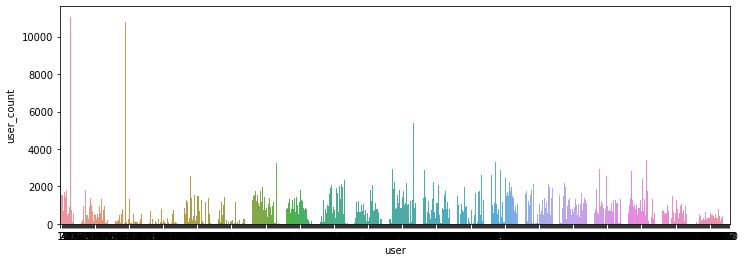

In [23]:
plt.figure(figsize=(12, 4))
sns.barplot(data=user_df, x='user', y='user_count')

In [24]:
df_orig[df_orig.date == '2020-05-13']

,date,time,page,user,cohort,ip
540672,2020-05-13,01:02:49,toc,559,53.0,73.178.174.162
540673,2020-05-13,01:03:43,spring/fundamentals/views,559,53.0,73.178.174.162
540674,2020-05-13,03:46:45,/,491,51.0,77.212.178.62
540675,2020-05-13,04:04:52,/,491,51.0,77.212.178.62
540676,2020-05-13,04:04:55,toc,491,51.0,77.212.178.62
...,...,...,...,...,...,...
541912,2020-05-13,23:54:07,/,514,28.0,68.12.194.144
541913,2020-05-13,23:54:08,spring,514,28.0,68.12.194.144
541914,2020-05-13,23:54:13,spring/fundamentals/repositories,514,28.0,68.12.194.144
541915,2020-05-13,23:56:29,spring/fundamentals/controllers,566,53.0,68.12.137.147


In [25]:
df_orig[df_orig.user > 570]

,date,time,page,user,cohort,ip
428518,2020-01-13,16:05:26,/,571,53.0,98.106.20.59
429478,2020-01-14,11:50:49,/,571,53.0,98.106.20.59
429481,2020-01-14,11:50:51,toc,571,53.0,98.106.20.59
429484,2020-01-14,11:51:00,html-css,571,53.0,98.106.20.59
429867,2020-01-14,14:52:13,toc,571,53.0,98.106.20.59
...,...,...,...,...,...,...
543590,2020-05-15,15:00:58,9-timeseries/4-explore,588,55.0,71.95.165.84
543591,2020-05-15,15:01:40,java-ii/file-io,602,56.0,48.188.241.68
543592,2020-05-15,15:01:54,9-timeseries/3-prep,582,55.0,48.135.163.38
543593,2020-05-15,15:03:37,jquery/ajax/requests-and-responses,637,57.0,71.121.18.17


In [26]:
df_orig[df_orig.cohort == 1].user.value_counts()

64     3767
11     2735
211    1065
60      517
313     270
312     116
148      80
398      77
146      63
248      48
170      43
257      34
209      17
402      17
316      14
141       9
95        9
212       1
Name: user, dtype: int64

In [27]:
df_orig[df_orig.cohort == 55.0].user.value_counts().sort_index()

575     344
576    1323
577     268
578     600
579     893
580    1146
581    1767
582     933
583     373
584    1011
585     759
586     683
587     576
588     525
589     570
590    1020
591     668
616     388
617     405
Name: user, dtype: int64

In [28]:
curie = df_orig[df_orig.cohort == 55.0]

curie.head(20)

,date,time,page,user,cohort,ip
445311,2020-02-03,15:39:34,login,575,55.0,98.106.20.59
445314,2020-02-03,15:39:35,/,576,55.0,98.106.20.59
445315,2020-02-03,15:39:37,/,577,55.0,98.106.20.59
445316,2020-02-03,15:39:37,login,575,55.0,98.106.20.59
445317,2020-02-03,15:39:43,/,578,55.0,98.106.20.59
445318,2020-02-03,15:40:05,/,575,55.0,98.106.20.59
445320,2020-02-03,15:40:23,/,579,55.0,98.106.20.59
445321,2020-02-03,15:40:26,/,580,55.0,98.106.20.59
445322,2020-02-03,15:40:35,/,581,55.0,98.106.20.59
445323,2020-02-03,15:40:35,/,582,55.0,98.106.20.59


In [29]:
curie_ip_df = pd.DataFrame(curie.ip.value_counts(dropna=False)).reset_index().\
                rename(index=str, columns={'index': 'ip', 'ip': 'ip_count'})

curie_ip_df

,ip,ip_count
0,98.106.20.59,5189
1,73.191.188.174,1319
2,100.127.114.141,894
3,75.193.168.160,637
4,65.251.10.182,519
...,...,...
207,174.150.141.37,1
208,175.208.17.32,1
209,108.78.222.83,1
210,108.78.219.155,1


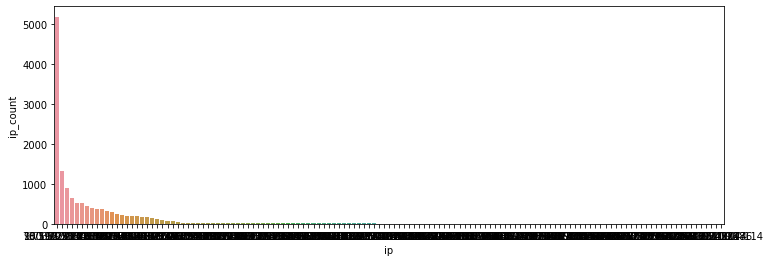

In [30]:
plt.figure(figsize=(12, 4))
sns.barplot(data=curie_ip_df[curie_ip_df.ip_count > 2], x='ip', y='ip_count')

In [31]:
curie.page.value_counts()

/                                                         865
6-regression/1-overview                                   446
1-fundamentals/modern-data-scientist.jpg                  410
1-fundamentals/AI-ML-DL-timeline.jpg                      408
1-fundamentals/1.1-intro-to-data-science                  405
                                                         ... 
12-distributed-ml/2-environment-setup                       1
9-timeseries/working-with-time-series-data-with-pandas      1
4.2-compare-means                                           1
b-clustering/project                                        1
AI-ML-DL-timeline.jpg                                       1
Name: page, Length: 218, dtype: int64

In [32]:
df_orig.head()

,date,time,page,user,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [33]:
df_orig['datetime'] = pd.to_datetime(df_orig.date + ' ' + df_orig.time)
df_orig = df_orig.drop(columns=['date', 'time']).set_index('datetime')

df_orig.head()

,page,user,cohort,ip
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [34]:
df_orig = df_orig.dropna(subset=['page'])

In [35]:
df_orig[df_orig.page.str.contains('slides')].tail(50)

,page,user,cohort,ip
datetime,,,,
2020-04-05 17:47:51,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:47:51,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:47:51,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:47:51,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:47:51,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:47:55,appendix/slides,570,53.0,173.125.68.94
2020-04-05 17:48:16,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:48:16,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94
2020-04-05 17:48:17,slides/inheritance_and_polymorphism,570,53.0,173.125.68.94


In [36]:
df_orig.loc['2019-02-01':'2019-02-01'].cohort.value_counts()

27.0    381
29.0    326
26.0     34
17.0     28
28.0     15
23.0     12
14.0      7
15.0      1
13.0      1
Name: cohort, dtype: int64

In [37]:
df_orig.loc['2019-02-02':'2019-02-02'].cohort.value_counts()

29.0    77
23.0    17
26.0     9
27.0     7
19.0     6
24.0     3
Name: cohort, dtype: int64

In [38]:
df_orig.loc['2019-01-20':'2019-01-20'].cohort.value_counts()

26.0    66
27.0    17
22.0     8
18.0     3
28.0     3
14.0     3
25.0     2
Name: cohort, dtype: int64

In [39]:
df_orig.loc['2019-02-03':'2019-02-03'].cohort.value_counts()

29.0    101
26.0     37
27.0     24
24.0      7
25.0      2
Name: cohort, dtype: int64

In [40]:
df_orig.loc['2019-02-04':'2019-02-04'].cohort.value_counts()

29.0    278
27.0    268
28.0     92
17.0     29
26.0     12
22.0      5
24.0      3
23.0      3
Name: cohort, dtype: int64

In [41]:
df_orig.loc['2019-02-05':'2019-02-05'].cohort.value_counts()

29.0    490
27.0    220
28.0     61
26.0     37
14.0      8
24.0      7
17.0      2
Name: cohort, dtype: int64

In [42]:
df_orig.loc['2019-02-06':'2019-02-06'].cohort.value_counts()

29.0    853
27.0    180
28.0     75
17.0     59
7.0      25
14.0     24
22.0     16
26.0     16
25.0      3
23.0      2
24.0      1
Name: cohort, dtype: int64

In [43]:
# looks like instructor / staff
df_orig[df_orig.cohort == 28.0]

,page,user,cohort,ip
datetime,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,98.106.20.59
2018-12-06 14:25:40,javascript-i,314,28.0,98.106.20.59
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,98.106.20.59
2018-12-06 15:31:29,spring,40,28.0,171.249.174.248
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,171.249.174.248
...,...,...,...,...
2020-05-15 14:52:04,10-anomaly-detection/4-detecting-timeseries-an...,11,28.0,77.186.132.227
2020-05-15 14:52:05,10-anomaly-detection/4-detecting-timeseries-an...,1,28.0,71.122.216.54
2020-05-15 14:52:13,10-anomaly-detection/3-discrete-probabilistic-...,11,28.0,77.186.132.227


In [44]:
# web_dev
df_orig[df_orig.cohort == 29.0].head(50)

,page,user,cohort,ip
datetime,,,,
2019-01-22 15:09:54,/,323,29.0,98.106.20.59
2019-01-22 15:10:01,toc,323,29.0,98.106.20.59
2019-01-22 15:11:47,/,324,29.0,98.106.20.59
2019-01-22 15:11:53,toc,323,29.0,98.106.20.59
2019-01-22 15:11:55,/,325,29.0,98.106.20.59
2019-01-22 15:11:55,html-css,323,29.0,98.106.20.59
2019-01-22 15:11:59,/,326,29.0,98.106.20.59
2019-01-22 15:12:00,java-i,325,29.0,98.106.20.59
2019-01-22 15:12:03,java-i/introduction-to-java,325,29.0,98.106.20.59


In [109]:
# also looks like instructor / staff - maybe student assistants?
df_orig[df_orig.cohort == 19.0].head(50)

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2018-01-26 12:37:53,/,37,19.0,193.172.118.211,,web_dev
2018-01-26 12:37:54,mkdocs/search_index.json,37,19.0,193.172.118.211,mkdocs,web_dev
2018-01-26 12:38:12,content/javascript/objects/math.html,37,19.0,193.172.118.211,content,web_dev
2018-01-26 12:38:19,content/laravel/quickstart/sessions.html,37,19.0,193.172.118.211,content,web_dev
2018-01-30 13:41:57,/,70,19.0,105.220.137.68,,web_dev
2018-01-30 13:42:05,content/php_iv,70,19.0,105.220.137.68,content,web_dev
2018-01-30 13:42:05,content/php_iv/gitbook/images/favicon.ico,70,19.0,105.220.137.68,content,web_dev
2018-01-30 13:42:08,content/php_iv/ad-lister,70,19.0,105.220.137.68,content,web_dev
2018-01-30 13:42:09,content/php_iv/ad-lister/gitbook/images/favico...,70,19.0,105.220.137.68,content,web_dev


In [46]:
curie.user.value_counts() # users 616 & 617 are students who logged in weirdly

581    1767
576    1323
580    1146
590    1020
584    1011
582     933
579     893
585     759
586     683
591     668
578     600
587     576
589     570
588     525
617     405
616     388
583     373
575     344
577     268
Name: user, dtype: int64

In [47]:
df_orig[df_orig.user == 616]

,page,user,cohort,ip
datetime,,,,
2020-03-16 10:28:58,/,616,55.0,71.115.10.242
2020-03-16 10:29:37,2-storytelling/3.3-creating-charts,616,55.0,71.115.10.242
2020-03-16 10:29:47,2-storytelling/3-tableau,616,55.0,71.115.10.242
2020-03-16 10:29:51,2-storytelling/3.4-creating-custom-fields,616,55.0,71.115.10.242
2020-03-16 10:30:04,2-storytelling/3.5-creating-dashboards,616,55.0,71.115.10.242
...,...,...,...,...
2020-05-15 09:06:11,9-timeseries/5.2-modeling-lesson2,616,55.0,71.115.10.242
2020-05-15 11:20:58,9-timeseries/5.2-modeling-lesson2,616,55.0,71.115.10.242
2020-05-15 11:32:34,9-timeseries/5.2-modeling-lesson2,616,55.0,71.115.10.242


In [48]:
df_orig[df_orig.user == 617]

,page,user,cohort,ip
datetime,,,,
2020-03-18 11:30:32,/,617,55.0,98.106.20.59
2020-03-18 11:30:42,5-stats/2-simulation,617,55.0,98.106.20.59
2020-03-18 12:40:10,5-stats/1-overview,617,55.0,98.106.20.59
2020-03-18 12:40:20,5-stats/2-simulation,617,55.0,98.106.20.59
2020-03-18 18:56:35,5-stats/2-simulation,617,55.0,65.251.10.182
...,...,...,...,...
2020-05-14 17:00:51,4-python/8.3-intro-to-numpy,617,55.0,65.251.10.182
2020-05-14 17:01:34,4-python/8.4.1-pandas-overview,617,55.0,65.251.10.182
2020-05-14 17:02:40,4-python/8.4.2-series,617,55.0,65.251.10.182


In [49]:
df_orig['page_1'], df_orig['page_2'] = df_orig['page'].str.split(pat='/', n=1, expand=True)
df_orig['page_1'] = df_orig['page'].str.split(pat='/', n=1, expand=True)
df_orig = df_orig.drop(columns='page_2')

df_orig.head(10)

,page,user,cohort,ip,page_1
datetime,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,slides
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,javascript-i
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62,javascript-i
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62,javascript-i
2018-01-26 09:56:48,javascript-i/functions,3,22.0,98.106.20.62,javascript-i
2018-01-26 09:56:59,javascript-i/loops,2,22.0,98.106.20.62,javascript-i


In [50]:
df_orig.page_1.value_counts()

javascript-i    73534
html-css        54877
mysql           53208
jquery          39765
spring          36130
                ...  
data-1              1
ui                  1
user-input          1
handouts            1
5.01                1
Name: page_1, Length: 636, dtype: int64

In [51]:
df_orig.loc['2019-01-02':'2019-01-02'].cohort.value_counts()

27.0    44
25.0    17
23.0    10
22.0     7
24.0     6
26.0     6
13.0     5
Name: cohort, dtype: int64

<Figure size 864x288 with 0 Axes>

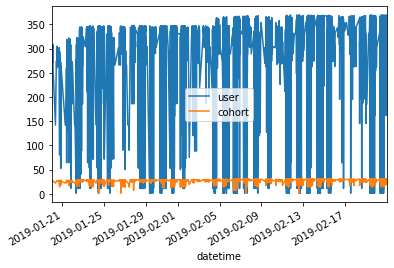

In [77]:
plt.figure(figsize=(12, 4))
df_orig.loc['2019-01-20' : '2019-02-20'].plot()

In [53]:
df_orig.loc['2019-01-20' : '2019-02-20'].cohort.value_counts()

29.0    8679
27.0    5340
28.0    2069
26.0    1787
24.0     434
25.0     286
17.0     279
23.0     174
14.0     128
22.0      96
13.0      42
21.0      41
18.0      40
16.0      37
7.0       28
15.0      24
19.0      12
1.0        9
2.0        4
Name: cohort, dtype: int64

In [54]:
df_orig[df_orig.page == '1-fundamentals/1.1-intro-to-data-science']

,page,user,cohort,ip,page_1
datetime,,,,,
2019-08-19 13:45:37,1-fundamentals/1.1-intro-to-data-science,1,28.0,98.106.20.59,1-fundamentals
2019-08-19 16:35:27,1-fundamentals/1.1-intro-to-data-science,146,28.0,98.106.20.59,1-fundamentals
2019-08-19 16:35:33,1-fundamentals/1.1-intro-to-data-science,146,28.0,98.106.20.59,1-fundamentals
2019-08-19 16:37:45,1-fundamentals/1.1-intro-to-data-science,146,28.0,98.106.20.59,1-fundamentals
2019-08-20 08:50:34,1-fundamentals/1.1-intro-to-data-science,11,28.0,98.106.20.59,1-fundamentals
...,...,...,...,...,...
2020-05-12 16:17:31,1-fundamentals/1.1-intro-to-data-science,248,28.0,174.174.116.202,1-fundamentals
2020-05-13 21:47:44,1-fundamentals/1.1-intro-to-data-science,483,34.0,97.9.131.241,1-fundamentals
2020-05-14 09:15:28,1-fundamentals/1.1-intro-to-data-science,585,55.0,25.27.250.216,1-fundamentals


In [55]:
df_orig[df_orig.page == '1-fundamentals/1.1-intro-to-data-science'].cohort.value_counts()

34.0    567
55.0    405
28.0    319
32.0      9
7.0       7
33.0      7
21.0      5
23.0      3
24.0      3
19.0      2
22.0      2
14.0      1
31.0      1
Name: cohort, dtype: int64

In [105]:
# looks like an old cohort, they are looking at capstone at the beginning
df_orig[df_orig.cohort == 21].user.value_counts()

41     1180
10      903
153     752
110     510
27      482
38      372
15      296
28      282
36      243
52      234
22      199
42      199
16      193
47      183
57      182
175     178
17      175
56      170
33      151
255     114
65      107
55       95
45       65
346      60
286      29
24       26
49       25
115       6
Name: user, dtype: int64

In [106]:
df_orig[df_orig.cohort == 21].head(50)

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2018-01-26 10:08:22,mkdocs/search_index.json,10,21.0,98.106.20.62,mkdocs,web_dev
2018-01-26 10:08:34,git/merge-conflict-demo,10,21.0,98.106.20.62,git,web_dev
2018-01-26 10:08:45,mkdocs/search_index.json,10,21.0,98.106.20.62,mkdocs,web_dev
2018-01-26 10:08:55,git/working-in-teams,10,21.0,98.106.20.62,git,web_dev
2018-01-26 10:18:22,/,10,21.0,98.106.20.62,,web_dev
2018-01-26 10:18:24,spring,10,21.0,98.106.20.62,spring,web_dev
2018-01-26 10:35:28,/,15,21.0,98.106.20.62,,web_dev
2018-01-26 10:35:29,spring,16,21.0,98.106.20.62,spring,web_dev
2018-01-26 10:35:32,appendix,15,21.0,98.106.20.62,appendix,web_dev


In [107]:
df_orig[df_orig.cohort == 21].tail(50)

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2020-04-24 01:30:17,java-ii/object-oriented-programming,10,21.0,100.48.143.89,java-ii,web_dev
2020-04-24 19:24:53,/,10,21.0,100.48.143.89,,web_dev
2020-04-24 19:24:56,java-i,10,21.0,100.48.143.89,java-i,web_dev
2020-04-24 19:24:57,java-ii,10,21.0,100.48.143.89,java-ii,web_dev
2020-04-24 19:25:03,java-ii/object-oriented-programming,10,21.0,100.48.143.89,java-ii,web_dev
2020-04-24 19:27:52,search/search_index.json,10,21.0,100.48.143.89,search,web_dev
2020-04-24 19:39:36,java-ii,10,21.0,100.48.143.89,java-ii,web_dev
2020-04-24 19:39:38,java-i,10,21.0,100.48.143.89,java-i,web_dev
2020-04-24 19:39:39,java-i/syntax-types-and-variables,10,21.0,100.48.143.89,java-i,web_dev


In [57]:
# is cohort 25 Ada? -> Nope
df_orig[df_orig.cohort == 25].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2018-07-23 13:51:26,registerUser,218,25.0,98.106.20.59,registerUser
2018-07-23 13:51:39,registerUser,218,25.0,98.106.20.59,registerUser
2018-07-23 15:15:19,/,219,25.0,98.106.20.59,
2018-07-23 15:15:20,/,220,25.0,98.106.20.59,
2018-07-23 15:15:21,/,221,25.0,98.106.20.59,
2018-07-23 15:15:21,/,222,25.0,98.106.20.59,
2018-07-23 15:15:24,toc,221,25.0,98.106.20.59,toc
2018-07-23 15:15:26,toc,220,25.0,98.106.20.59,toc
2018-07-23 15:15:27,/,223,25.0,98.106.20.59,


In [58]:
# is cohort 26 Ada? -> Nope
df_orig[df_orig.cohort == 26].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2018-09-17 14:12:28,/,259,26.0,98.106.20.59,
2018-09-17 14:13:38,/,260,26.0,98.106.20.59,
2018-09-17 14:13:42,html-css,260,26.0,98.106.20.59,html-css
2018-09-17 14:13:58,/,261,26.0,98.106.20.59,
2018-09-17 14:14:21,/,262,26.0,98.106.20.59,
2018-09-17 14:14:46,/,263,26.0,98.106.20.59,
2018-09-17 14:15:51,/,264,26.0,98.106.20.59,
2018-09-17 14:15:57,/,265,26.0,98.106.20.59,
2018-09-17 14:16:11,html-css/introduction,260,26.0,98.106.20.59,html-css


In [59]:
# is cohort 27 Ada? -> Nope
df_orig[df_orig.cohort == 27].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2018-11-05 14:03:58,/,287,27.0,98.106.20.59,
2018-11-05 14:04:58,/,288,27.0,98.106.20.59,
2018-11-05 14:05:18,/,289,27.0,98.106.20.59,
2018-11-05 14:06:41,/,290,27.0,98.106.20.59,
2018-11-05 14:06:51,/,291,27.0,98.106.20.59,
2018-11-05 14:06:54,toc,290,27.0,98.106.20.59,toc
2018-11-05 14:07:02,toc,291,27.0,98.106.20.59,toc
2018-11-05 14:07:14,html-css,291,27.0,98.106.20.59,html-css
2018-11-05 14:07:20,/,292,27.0,98.106.20.59,


In [60]:
# is cohort 28 Ada? -> Nope
df_orig[df_orig.cohort == 28].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2018-12-06 14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,98.106.20.59,appendix
2018-12-06 14:25:40,javascript-i,314,28.0,98.106.20.59,javascript-i
2018-12-06 14:25:41,javascript-i/coffee-project,314,28.0,98.106.20.59,javascript-i
2018-12-06 15:31:29,spring,40,28.0,171.249.174.248,spring
2018-12-06 15:31:33,spring/fundamentals/security,40,28.0,171.249.174.248,spring
2018-12-06 15:33:32,appendix/further-reading/spring/authorization,40,28.0,171.249.174.248,appendix
2018-12-06 15:34:29,spring/fundamentals/security/authentication,40,28.0,171.249.174.248,spring
2018-12-06 15:38:58,appendix/further-reading/spring/authorization,40,28.0,171.249.174.248,appendix
2018-12-06 15:39:55,appendix/further-reading/spring/security-use-c...,40,28.0,171.249.174.248,appendix


In [61]:
# is cohort 29 Ada? -> Nope
df_orig[df_orig.cohort == 29].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2019-01-22 15:09:54,/,323,29.0,98.106.20.59,
2019-01-22 15:10:01,toc,323,29.0,98.106.20.59,toc
2019-01-22 15:11:47,/,324,29.0,98.106.20.59,
2019-01-22 15:11:53,toc,323,29.0,98.106.20.59,toc
2019-01-22 15:11:55,/,325,29.0,98.106.20.59,
2019-01-22 15:11:55,html-css,323,29.0,98.106.20.59,html-css
2019-01-22 15:11:59,/,326,29.0,98.106.20.59,
2019-01-22 15:12:00,java-i,325,29.0,98.106.20.59,java-i
2019-01-22 15:12:03,java-i/introduction-to-java,325,29.0,98.106.20.59,java-i


In [62]:
# is cohort 30 Ada? -> Hmmm....
df_orig[df_orig.cohort == 30].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,


In [63]:
# is cohort 31 Ada? -> Nope
df_orig[df_orig.cohort == 31].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31.0,98.106.20.59,assets
2019-03-18 16:02:00,/,374,31.0,98.106.20.59,
2019-03-18 16:02:08,toc,374,31.0,98.106.20.59,toc
2019-03-18 18:53:35,/,376,31.0,174.174.128.102,
2019-03-18 18:55:34,toc,376,31.0,174.174.128.102,toc
2019-03-18 18:58:56,html-css,376,31.0,174.174.128.102,html-css
2019-03-18 19:05:33,html-css/introduction,376,31.0,174.174.128.102,html-css
2019-03-18 19:26:01,html-css/elements,376,31.0,174.174.128.102,html-css
2019-03-18 20:17:46,appendix/git/intellij-intro,377,31.0,174.240.233.98,appendix


In [64]:
# is cohort 32 Ada? -> Nope
df_orig[df_orig.cohort == 32].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2019-05-29 09:48:59,/,407,32.0,98.106.20.59,
2019-05-29 09:56:08,/,408,32.0,98.106.20.59,
2019-05-29 10:01:23,/,409,32.0,98.106.20.59,
2019-05-29 10:01:28,/,410,32.0,98.106.20.59,
2019-05-29 10:01:31,html-css,409,32.0,98.106.20.59,html-css
2019-05-29 10:01:36,/,411,32.0,98.106.20.59,
2019-05-29 10:01:43,/,412,32.0,98.106.20.59,
2019-05-29 10:01:43,/,413,32.0,98.106.20.59,
2019-05-29 10:01:44,/,414,32.0,98.106.20.59,


In [65]:
# is cohort 33 Ada? -> Nope
df_orig[df_orig.cohort == 33].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2019-07-15 15:39:34,/,433,33.0,98.106.20.59,
2019-07-15 15:39:48,toc,433,33.0,98.106.20.59,toc
2019-07-15 15:40:29,quiz,434,33.0,98.106.20.59,quiz
2019-07-15 15:40:33,/,434,33.0,98.106.20.59,
2019-07-15 15:40:35,javascript-i,433,33.0,98.106.20.59,javascript-i
2019-07-15 15:40:55,spring,433,33.0,98.106.20.59,spring
2019-07-15 15:40:58,java-i,433,33.0,98.106.20.59,java-i
2019-07-15 15:41:06,javascript-i,433,33.0,98.106.20.59,javascript-i
2019-07-15 15:41:14,java-iii,433,33.0,98.106.20.59,java-iii


In [66]:
# Found Bayes...
df_orig[df_orig.cohort == 34].head(50)

,page,user,cohort,ip,page_1
datetime,,,,,
2019-08-20 09:39:58,/,466,34.0,98.106.20.59,
2019-08-20 09:39:59,/,467,34.0,98.106.20.59,
2019-08-20 09:39:59,/,468,34.0,98.106.20.59,
2019-08-20 09:40:02,/,469,34.0,98.106.20.59,
2019-08-20 09:40:08,/,470,34.0,98.106.20.59,
2019-08-20 09:40:15,/,471,34.0,98.106.20.59,
2019-08-20 09:40:15,/,472,34.0,98.106.20.59,
2019-08-20 09:40:17,/,473,34.0,98.106.20.59,
2019-08-20 09:40:18,/,474,34.0,98.106.20.59,


In [67]:
# users 349 : 369 are from Ada!!
# fill those nulls...
df_orig[(df_orig.user >= 349) & (df_orig.user <= 369)] = df_orig[(df_orig.user >= 349) & (df_orig.user <= 369)].fillna(30.0)

df_orig.shape

(543595, 5)

In [88]:
# what is cohort 8?? user 1 is from that one, which is suspicious...
df_orig[df_orig.cohort == 8].user.value_counts()

1      1617
646      41
150      23
114      18
174      13
Name: user, dtype: int64

In [93]:
# what is cohort 22?? looks like web_dev
df_orig[df_orig.cohort == 22].user.value_counts()

7      1803
5      1701
3      1562
2      1541
19     1518
18     1511
6      1408
30     1397
138    1264
142    1141
31     1004
39      975
23      969
44      942
29      894
99      796
12      736
43      731
155     726
4       692
20      682
32      670
14      596
9       585
34      509
35      494
8       483
25      451
254     436
154     266
180     249
284      92
13       79
46       54
459      40
Name: user, dtype: int64

In [98]:
# what is cohort 21?? looks like web_dev
df_orig[df_orig.cohort == 21].head(50)

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2018-01-26 10:08:22,mkdocs/search_index.json,10,21.0,98.106.20.62,mkdocs,web_dev
2018-01-26 10:08:34,git/merge-conflict-demo,10,21.0,98.106.20.62,git,web_dev
2018-01-26 10:08:45,mkdocs/search_index.json,10,21.0,98.106.20.62,mkdocs,web_dev
2018-01-26 10:08:55,git/working-in-teams,10,21.0,98.106.20.62,git,web_dev
2018-01-26 10:18:22,/,10,21.0,98.106.20.62,,web_dev
2018-01-26 10:18:24,spring,10,21.0,98.106.20.62,spring,web_dev
2018-01-26 10:35:28,/,15,21.0,98.106.20.62,,web_dev
2018-01-26 10:35:29,spring,16,21.0,98.106.20.62,spring,web_dev
2018-01-26 10:35:32,appendix,15,21.0,98.106.20.62,appendix,web_dev


In [89]:
df_orig['section'] = np.where(df_orig.cohort == 55, 'ds',
                             np.where(df_orig.cohort == 34, 'ds',
                                     np.where(df_orig.cohort == 30, 'ds',
                                             np.where(df_orig.cohort == 28, 'staff',
                                                      np.where(df_orig.cohort == 1, 'staff_1',
                                                               np.where(df_orig.cohort == 8, 'staff','web_dev'))))))
                              
# curie cohort == 55
# bayes cohort == 34 
# ada cohort  == 30, but they are NaN... users 349 : 369 are from Ada!!
# staff is 28

In [94]:
df_orig.head(50)

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62,,staff
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62,java-ii,staff
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62,java-ii,staff
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62,slides,staff
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62,javascript-i,web_dev
2018-01-26 09:56:41,javascript-i/loops,2,22.0,98.106.20.62,javascript-i,web_dev
2018-01-26 09:56:46,javascript-i/conditionals,3,22.0,98.106.20.62,javascript-i,web_dev
2018-01-26 09:56:48,javascript-i/functions,3,22.0,98.106.20.62,javascript-i,web_dev
2018-01-26 09:56:59,javascript-i/loops,2,22.0,98.106.20.62,javascript-i,web_dev


In [72]:
df_orig[df_orig.section == 'ds']

,page,user,cohort,ip,page_1,section
datetime,,,,,,
2019-02-04 16:22:20,/,349,30.0,98.106.20.59,,ds
2019-02-04 16:22:36,/,350,30.0,98.106.20.59,,ds
2019-02-04 16:23:07,1._Fundamentals,350,30.0,98.106.20.59,1._Fundamentals,ds
2019-02-04 16:23:34,/,351,30.0,98.106.20.59,,ds
2019-02-04 16:36:36,/,352,30.0,98.106.20.59,,ds
...,...,...,...,...,...,...
2020-05-15 14:46:46,search/search_index.json,591,55.0,174.176.101.202,search,ds
2020-05-15 14:47:01,appendix/professional-development/t-block-less...,591,55.0,174.176.101.202,appendix,ds
2020-05-15 14:49:50,appendix/professional-development/vertical-resume,591,55.0,174.176.101.202,appendix,ds


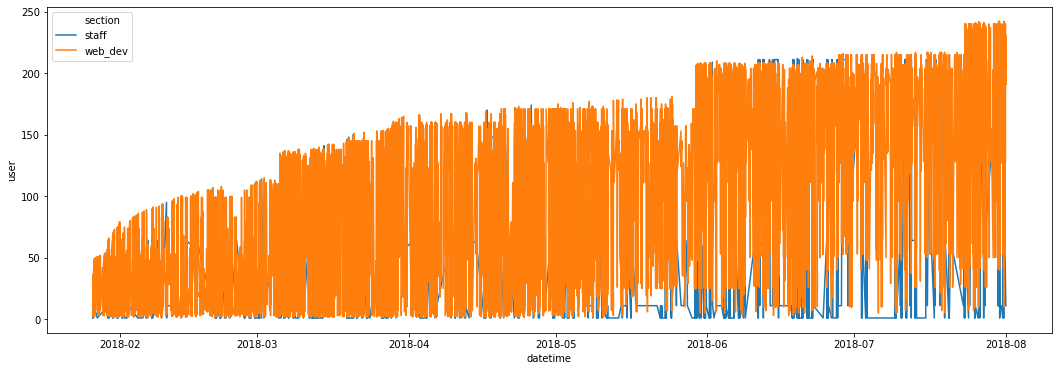

In [100]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df_orig.loc['2018-01':'2018-07'].index, y="user",
             hue="section", data=df_orig.loc['2018-01':'2018-07'])

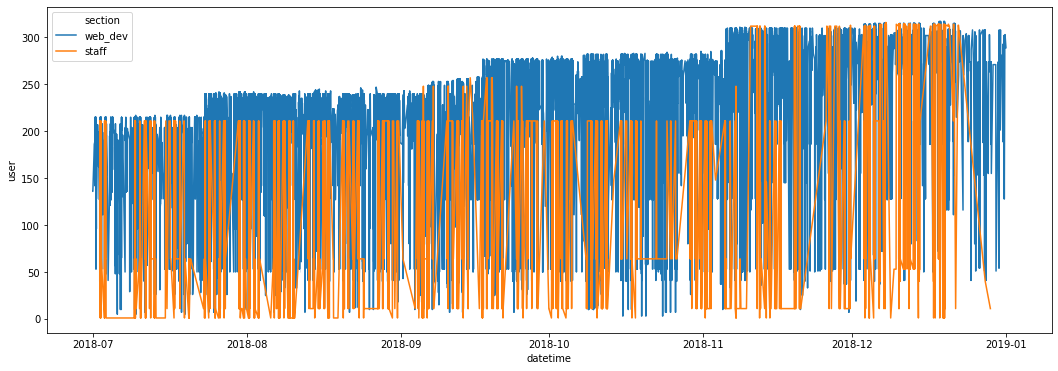

In [101]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df_orig.loc['2018-07':'2018-12'].index, y="user",
             hue="section", data=df_orig.loc['2018-07':'2018-12'])

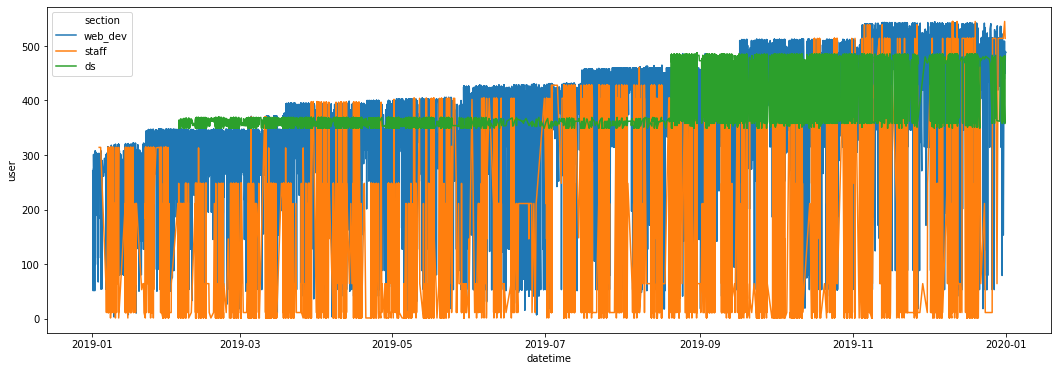

In [92]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df_orig.loc['2019'].index, y="user",
             hue="section", data=df_orig.loc['2019'])

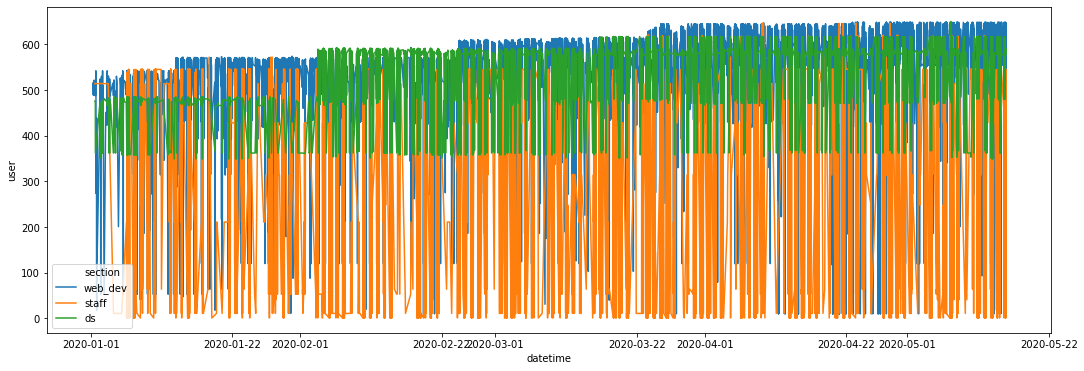

In [102]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df_orig.loc['2020'].index, y="user",
             hue="section", data=df_orig.loc['2020'])

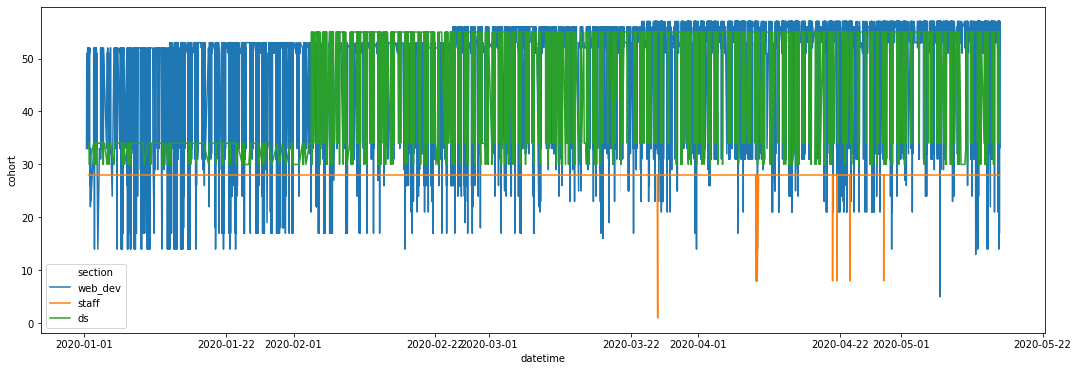

In [103]:
plt.figure(figsize=(18, 6))
sns.lineplot(x=df_orig.loc['2020'].index, y="cohort",
             hue="section", data=df_orig.loc['2020'])

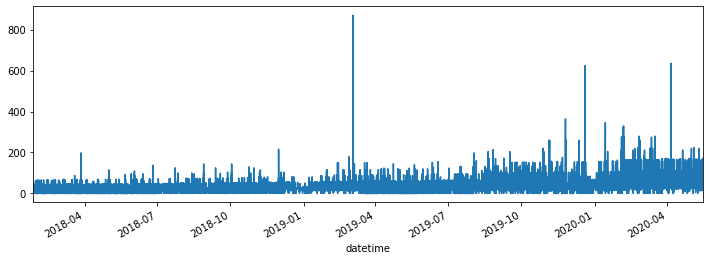

In [80]:
plt.figure(figsize=(12, 4))
df_orig.groupby(by=df_orig.index).cohort.sum().plot()